In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('C:\\Users\\korchagin.ivan\\OneDrive - ООО М5\\Рабочий стол\\water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [23]:
df.info

<bound method DataFrame.info of     Unnamed: 0 location           town  mortality  hardness
0            1    South           Bath       1247       105
1            2    North     Birkenhead       1668        17
2            3    South     Birmingham       1466         5
3            4    North      Blackburn       1800        14
4            5    North      Blackpool       1609        18
..         ...      ...            ...        ...       ...
56          57    South        Walsall       1527        60
57          58    South  West Bromwich       1627        53
58          59    South       West Ham       1486       122
59          60    South  Wolverhampton       1485        81
60          61    North           York       1378        71

[61 rows x 5 columns]>

№1. Построим точечный график

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

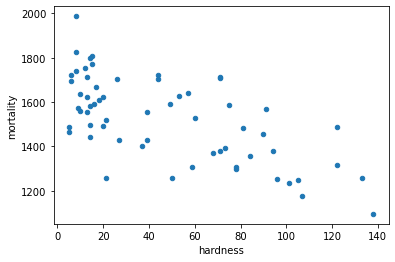

In [8]:
df.plot(kind='scatter', x='hardness', y='mortality')

№2. Рассчитаем коэффициенты корреляции Пирсона и Спирмена

In [14]:
df[['hardness', 'mortality']].corr() 
# Видим среднюю обратнуюю взаимосвязь между концентрации кальция и смертностью 

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [16]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


№3. Построим модель линейной регрессии

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X = df[['hardness']]
y = df['mortality']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [35]:
X_train.shape
# 42 строки осталось для обучения

(42, 1)

In [29]:
y_train.shape

(42,)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_
# Это 'а' в уравнении: ax+b

array([-2.82453339])

In [38]:
model.intercept_
# Это 'b' в уравнении: ax+b

1646.9143769470734

In [57]:
y_pred = model.predict(X_test) #Прогназируем значения для тестового набора данных
y_pred

array([1624.31810986, 1607.37090954, 1257.12876967, 1508.51224103,
       1389.88183882, 1629.96717663, 1440.72343976, 1446.37250654,
       1536.75757489, 1344.68930464, 1361.63650495, 1607.37090954,
       1522.63490796, 1446.37250654, 1607.37090954, 1485.91597394,
       1604.54637616, 1381.40823866, 1632.79171002])

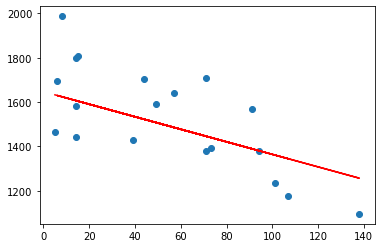

In [55]:
plt.scatter(X_test, y_test) # Визуализируем модель регрессии
plt.plot(X_test, y_pred, c='r')

№4. Рассчитаем коэффициент детерминации (оценим получившуюся модель)

In [43]:
model.score(X_test, y_test) # Регрессия получилось нормальной

0.45313898809044173

№5. Построим график остатков для оценки модели

In [62]:
residuals = y_test - y_pred # разница между прогнозами и фактом

<AxesSubplot:xlabel='mortality'>

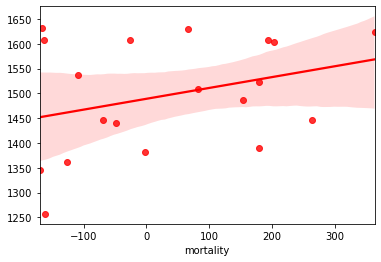

In [72]:
sns.regplot(x = residuals, y = y_pred, scatter = True, color = 'red') 
# Модель подобрана правильно: данные ведут себя хаотично; нет явных закономерностей; однако, есть выбросы.

# Вывод: есть определенная связь между жёсткостью воды и средней годовой смертностью

№6. Посмотрим: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности

In [92]:
df_South = df.loc[df.location == 'South']
df_North = df.loc[df.location == 'North']

<AxesSubplot:title={'center':'Точечный график для северных регионов'}, xlabel='hardness', ylabel='mortality'>

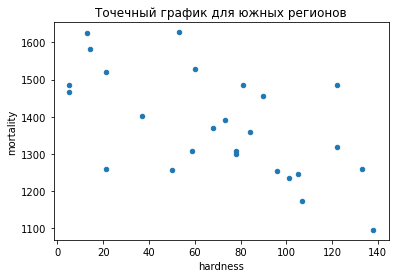

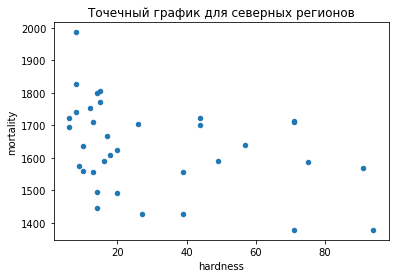

In [117]:
df_South.plot(kind='scatter', x='hardness', y='mortality', title = 'Точечный график для южных регионов')
df_North.plot(kind='scatter', x='hardness', y='mortality', title = 'Точечный график для северных регионов')

Обратная взаимосвязь между жесткостью воды и смертностью ниже в северных регионах 

In [94]:
df_South[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [95]:
df_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [96]:
df_North[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [98]:
df_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Построим и оценим модель линейной регрессии для южных регионов

Коэффициент детерминации для южных регионов 0.4336497594699127
Визуализизация модели регрессии


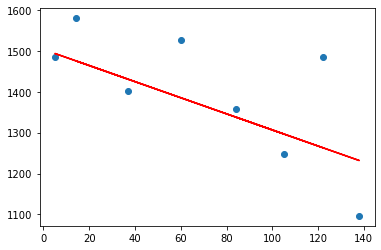

Визуализация анализа остатков


<AxesSubplot:xlabel='mortality'>

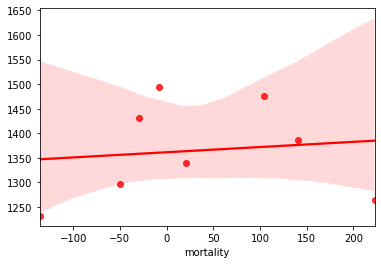

In [127]:
X = df_South[['hardness']]
y = df_South['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Коэффициент детерминации для южных регионов', model.score(X_test, y_test))

print('Визуализизация модели регрессии')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.show()

print('Визуализация анализа остатков')
residuals = y_test - y_pred
sns.regplot(x = residuals, y = y_pred, scatter = True, color = 'red') 


Построим и оценим модель линейной регрессии для северных регионов

Коэффициент детерминации для северных регионов 0.15210629492382466
Визуализизация модели регрессии


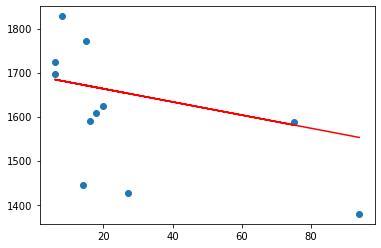

Визуализация анализа остатков


<AxesSubplot:xlabel='mortality'>

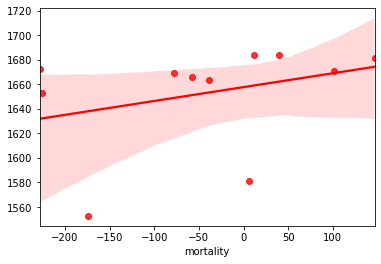

In [129]:
X = df_North[['hardness']]
y = df_North['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Коэффициент детерминации для северных регионов', model.score(X_test, y_test))

print('Визуализизация модели регрессии')
plt.scatter(X_test, y_test) # Визуализируем модель регрессии
plt.plot(X_test, y_pred, c='r')
plt.show()

print('Визуализация анализа остатков')
residuals = y_test - y_pred
sns.regplot(x = residuals, y = y_pred, scatter = True, color = 'red') 

Вывод: Для северных регионов найденная зависимость не сохраняется